In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from IPython.display import display


pd.options.display.max_columns = None

In [2]:
# Store filepath in a variable
crimeDataFile = "Raw Data/Try Data/crimedata.csv"
housingPriceFile = "Raw Data/Try Data/Zip_MedianValue-2016-AllHomes.csv"

In [3]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
crime_data_df = pd.read_csv(crimeDataFile, encoding="ISO-8859-1")
price_data_city_df = pd.read_csv(housingPriceFile, encoding="ISO-8859-1")
#crime_data_df.head(3)

In [4]:
#price_data_city_df.columns.get_values()
#price_data_city_df.head()

In [5]:
#price_data_city_df[price_data_city_df.columns[23:]].replace('[\$,]', '',  regex=True).astype(int)
#price_data_city_df.head()



In [6]:
crime_data_df = crime_data_df.sort_values(by=['State','County_name'])
crime_data_df.columns.str.strip()
crime_data_df.columns.str.title()


#crime_data_df.head(3)

Index(['County_Name', 'State', 'Crime_Rate_Per_100000', 'Index', 'Edition',
       'Part', 'Idno', 'Cpoparst', 'Cpopcrim', 'Ag_Arrst', 'Ag_Off', 'Covind',
       'Index', 'Modindx', 'Murder', 'Rape', 'Robbery', 'Agasslt', 'Burglry',
       'Larceny', 'Mvtheft', 'Arson', 'Population', 'Fips_St', 'Fips_Cty',
       'Fips_Cd'],
      dtype='object')

In [7]:
# define a function for finding optimal location for bar height values
def ylabelloc(yaxis):
    return (max(yaxis)*0.03)

In [8]:
def printContyCrimeInfo(fips_st, fips_cty):
    crime_info = crime_data_df.loc[(crime_data_df['FIPS_ST'] == fips_st) & (crime_data_df['FIPS_CTY'] == fips_cty)]
    crime_info = crime_info[['State','County_name','crime_rate_per_100000','MURDER','RAPE','ROBBERY', 'AGASSLT', 'BURGLRY', 
                            'LARCENY','MVTHEFT', 'ARSON']]
    crime_info.reset_index(drop = True, inplace = True)
    
    #print(crime_info)
    #print(type(crime_info))
    crime_details = {'Type of Crime': 
                     ['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary', 'Larceny', 'MV Theft', 'Arson'],
                     'Number of Crimes': 
                     [crime_info.iat[0,3],crime_info.iat[0,4],crime_info.iat[0,5],crime_info.iat[0,6],crime_info.iat[0,7],
                     crime_info.iat[0,8],crime_info.iat[0,9],crime_info.iat[0,10]]
                    }
    #print(crime_details)
    x_axis = np.arange(len(crime_details['Type of Crime']))
    y_axis = crime_details['Number of Crimes']
    labels = crime_details['Type of Crime']
    print("************************************************************")
    print("**                  CRIME PROFILE                         **")
    print("************************************************************")
    #print(f"State : {crime_info.iat[0,1]}, County: {crime_info[0,0]}")
    
    display(crime_info)
    #print(labels)
    
    #set plot
    fig, ax = plt.subplots()

    ax.bar(x_axis,y_axis,color='b', alpha=0.5, align="center" )
    
    # Tell matplotlib where we would like to place each of our x axis headers
    tick_locations = [value for value in x_axis]
    plt.xticks(tick_locations, labels,  rotation = 90)
    
    # Sets the x limits of the current chart
    plt.xlim(-0.75, len(x_axis)-0.25)
    # Sets the y limits of the current chart
    plt.ylim(0, max(y_axis)+max(y_axis)*0.2)
    
    # Give our chart some labels and a tile
    ax.set_title("Crime Profile")
    ax.set_xlabel("Type of Crime")
    ax.set_ylabel("Number of Crimes reported")
    plt.grid(axis = 'y')
    
    
    #Loop through each bar and label the compound score against each bar
    for i in range(0, len(x_axis)):
        ax.text(tick_locations[i]-0.35, y_axis[i] + ylabelloc(y_axis), str(y_axis[i]), 
            color='blue', va='center', fontweight='bold')
   

    

    
#printContyCrimeInfo(6,1)


In [9]:
def printDetails(fips_cd):
    housing_details_df = summary_data_df.loc[summary_data_df['FIPS_CD'] == fips_cd]
    #print(housing_details_df.columns.get_values())
    housing_details_df = housing_details_df[['FIPS_ST','FIPS_CTY','State','County_name','Affordability Index',
                                            ' Average Home Value sqf for 2016 ','Average Home Value [Average New Home Size 2491sq]',
                                            'Average Home Value [Average Old Home Size 1660sq]']]
    
    #formatting price to dollars
    housing_details_df[' Average Home Value sqf for 2016 '] = housing_details_df[' Average Home Value sqf for 2016 '].map('${:,.2f}'.format)
    housing_details_df['Average Home Value [Average New Home Size 2491sq]'] = housing_details_df['Average Home Value [Average New Home Size 2491sq]'].map('${:,.2f}'.format)
    housing_details_df['Average Home Value [Average Old Home Size 1660sq]'] = housing_details_df['Average Home Value [Average Old Home Size 1660sq]'].map('${:,.2f}'.format)
    
    print("\n\n")
    print("************************************************************")
    print("**                  Housing Market                        **")
    print("************************************************************")
    
    
    display(housing_details_df)
    
    print("\n\n")
    printContyCrimeInfo(housing_details_df.iat[0,0],housing_details_df.iat[0,1])
    
    print("\n\n")
    
#printDetails(6001)


In [10]:
#trying bqplot
from bqplot import pyplot as bplt
from bqplot import *
from ipywidgets import Layout

In [11]:
df = crime_data_df

In [12]:
price_data_df = price_data_city_df.groupby(['FIPS State','FIPS County'], as_index = False).mean().round(0)
price_data_df['FIPS_CD'] = price_data_df['FIPS_CD'].astype(int)
#price_data_df.head()


In [13]:
summary_data_df = price_data_df.merge(df,how = 'inner', on = ['FIPS_CD'])

In [14]:
#summary_data_df.head()

In [15]:
map_fig = bplt.figure(title = 'Home Affordability')
map_tt = Tooltip(fields=['name','color'],labels =['County Name', 'Affordability Index'])
map_res = bplt.geo(map_data = 'USCountiesMap',stroke_color ='black',
                   interactions={'click': 'select', 'hover': 'tooltip','lasso_sel': 'panzoom'},
                 colors = {'default_color': 'Black'},
                    scales = {'projection' : AlbersUSA(),
                             'color' : ColorScale(colors=['Red','Gray','Blue'])},
                  color = dict(zip(summary_data_df['FIPS_CD'], summary_data_df['Affordability Index'])),tooltip=map_tt)

In [16]:
map_fig


Figure(axes=[ColorAxis(scale=ColorScale(colors=['Red', 'Gray', 'Blue']))], fig_margin={'top': 60, 'bottom': 60…




************************************************************
**                  Housing Market                        **
************************************************************


,FIPS_ST,FIPS_CTY,State,County_name,Affordability Index,Average Home Value sqf for 2016,Average Home Value [Average New Home Size 2491sq],Average Home Value [Average Old Home Size 1660sq]
34,6,83,CA,Santa Barbara,21.0,$471.00,"$1,173,953.00","$782,321.00"





************************************************************
**                  CRIME PROFILE                         **
************************************************************


,State,County_name,crime_rate_per_100000,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,CA,Santa Barbara,377.096927,6,146,311,1180,2430,6933,801,54


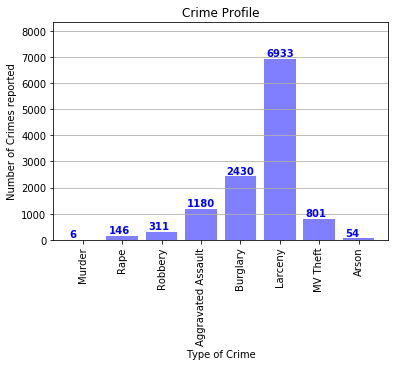

In [19]:
# clicking on any county will update the 'selected' attribute of map_mark.
# Use the same to obtain the details of the county. 
if(map_res.selected !=[]):
    printDetails(map_res.selected[-1])